In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [89]:
# Load the dataset
df = pd.read_csv('Netflix Dataset.csv')

In [90]:
print(f"\nDataset Shape: {df.shape[0]} rows  {df.shape[1]} columns")


Dataset Shape: 7789 rows  11 columns


In [91]:
print(f"\nColumn Names and Types:")
print(df.dtypes)





Column Names and Types:
Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object


In [92]:

print("\n\nDataset Info:")
print(df.info())





Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


In [93]:
print("\n\nMissing Values Summary:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
})
print(missing_df)



Missing Values Summary:
          Column  Missing_Count  Missing_Percentage
0        Show_Id              0            0.000000
1       Category              0            0.000000
2          Title              0            0.000000
3       Director           2388           30.658621
4           Cast            718            9.218128
5        Country            507            6.509180
6   Release_Date             10            0.128386
7         Rating              7            0.089870
8       Duration              0            0.000000
9           Type              0            0.000000
10   Description              0            0.000000


In [94]:
print(df.describe(include='all'))

       Show_Id Category              Title                Director  \
count     7789     7789               7789                    5401   
unique    7787        2               7787                    4050   
top      s6621    Movie  The Lost Okoroshi  Raúl Campos, Jan Suter   
freq         2     5379                  2                      18   

                      Cast        Country     Release_Date Rating  Duration  \
count                 7071           7282             7779   7782      7789   
unique                6831            681             1565     14       216   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    18           2556              118   2865      1608   

                 Type                                        Description  
count            7789                                               7789  
unique            492                                               7769  
top     Documentaries  Multi

In [95]:
# Create a copy for processing
df_clean = df.copy()

In [96]:
# Handle missing values
print("\nHandling missing values...")
df_clean['Director'].fillna('Unknown', inplace=True)
df_clean['Cast'].fillna('No Cast Info', inplace=True)
df_clean['Country'].fillna('Unknown', inplace=True)
df_clean['Rating'].fillna('Not Rated', inplace=True)


Handling missing values...


In [97]:
df_clean.isnull().sum()

Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    10
Rating           0
Duration         0
Type             0
Description      0
dtype: int64

In [98]:
# Parse Release_Date to extract year
df_clean['Release_Date'] = pd.to_datetime(df_clean['Release_Date'], errors='coerce')
df_clean['release_year'] = df_clean['Release_Date'].dt.year
df_clean['release_month'] = df_clean['Release_Date'].dt.month

In [99]:
print(f"\nCleaned Dataset Shape: {df_clean.shape}")


Cleaned Dataset Shape: (7789, 13)


In [100]:
df_clean.isnull().sum()


Show_Id           0
Category          0
Title             0
Director          0
Cast              0
Country           0
Release_Date     98
Rating            0
Duration          0
Type              0
Description       0
release_year     98
release_month    98
dtype: int64

In [101]:
df_clean.shape

(7789, 13)

In [102]:
df_clean.dropna(inplace=True)

In [103]:
df_clean.shape

(7691, 13)

In [104]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7691 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Show_Id        7691 non-null   object        
 1   Category       7691 non-null   object        
 2   Title          7691 non-null   object        
 3   Director       7691 non-null   object        
 4   Cast           7691 non-null   object        
 5   Country        7691 non-null   object        
 6   Release_Date   7691 non-null   datetime64[ns]
 7   Rating         7691 non-null   object        
 8   Duration       7691 non-null   object        
 9   Type           7691 non-null   object        
 10  Description    7691 non-null   object        
 11  release_year   7691 non-null   float64       
 12  release_month  7691 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 841.2+ KB


In [105]:
from collections import Counter

# Split each genre by comma and flatten the list
all_genres = df['Type'].str.split(', ').dropna()
flat_genres = [genre for sublist in all_genres for genre in sublist]

# Count frequency of each genre
genres_count = Counter(flat_genres)
top_genres = dict(genres_count.most_common(10))


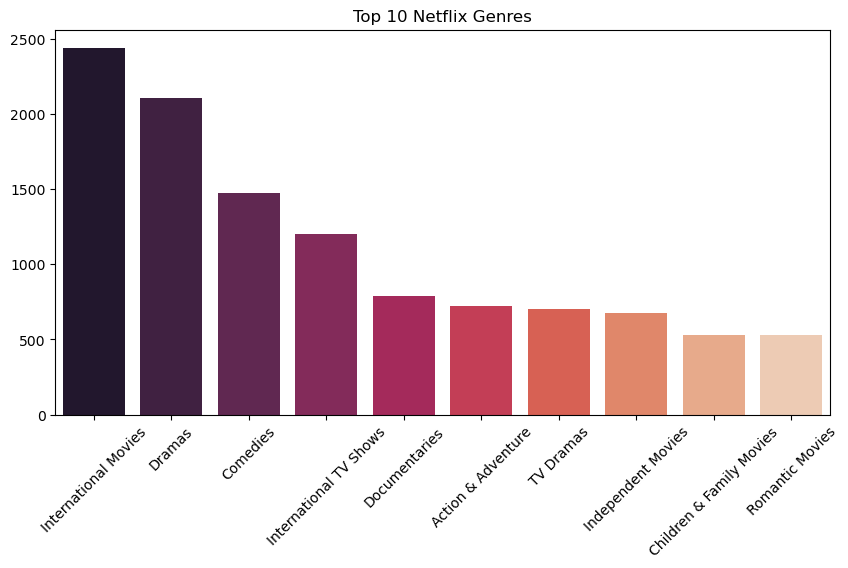

In [106]:

# Visualize top 10 genres
plt.figure(figsize=(10,5))
sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()), palette='rocket')
plt.title('Top 10 Netflix Genres')
plt.xticks(rotation=45)
plt.show()

In [107]:
# Highest genre
highest_genre = genres_count.most_common(1)[0]  # (genre, count)

# Lowest genre
lowest_genre = min(genres_count.items(), key=lambda x: x[1])  # (genre, count)

print(f"Highest Genre: {highest_genre[0]} with {highest_genre[1]} titles")
print(f"Lowest Genre: {lowest_genre[0]} with {lowest_genre[1]} titles")


Highest Genre: International Movies with 2437 titles
Lowest Genre: TV Shows with 12 titles


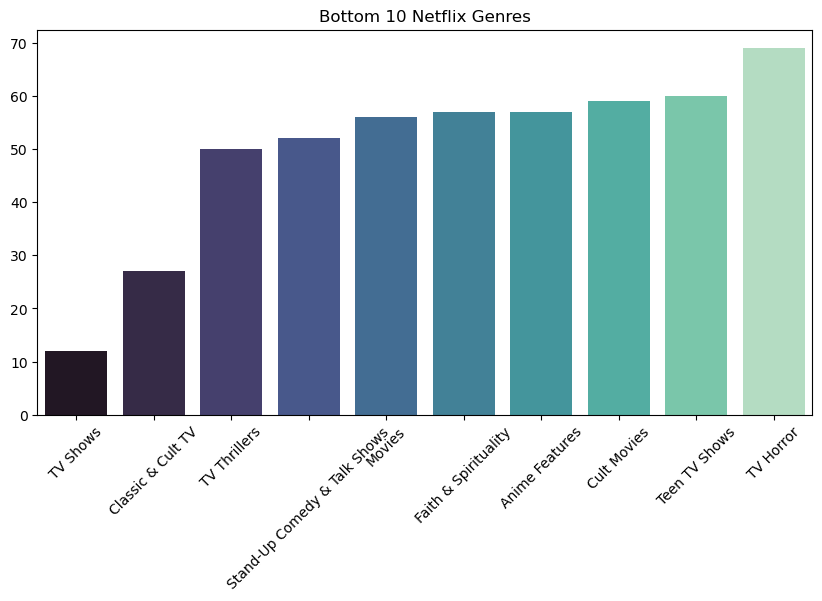

In [108]:
# Bottom 10
bottom_10 = dict(sorted(genres_count.items(), key=lambda x: x[1])[:10])
plt.figure(figsize=(10,5))
sns.barplot(x=list(bottom_10.keys()), y=list(bottom_10.values()), palette='mako')
plt.title('Bottom 10 Netflix Genres')
plt.xticks(rotation=45)
plt.show()

In [109]:
# Split 'Type' by comma and explode into separate rows
df_exploded = df_clean.copy()
df_exploded['Type'] = df_exploded['Type'].str.split(', ')
df_exploded = df_exploded.explode('Type')

In [110]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Show_Id        16874 non-null  object        
 1   Category       16874 non-null  object        
 2   Title          16874 non-null  object        
 3   Director       16874 non-null  object        
 4   Cast           16874 non-null  object        
 5   Country        16874 non-null  object        
 6   Release_Date   16874 non-null  datetime64[ns]
 7   Rating         16874 non-null  object        
 8   Duration       16874 non-null  object        
 9   Type           16874 non-null  object        
 10  Description    16874 non-null  object        
 11  release_year   16874 non-null  float64       
 12  release_month  16874 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 1.8+ MB


<Figure size 1400x700 with 0 Axes>

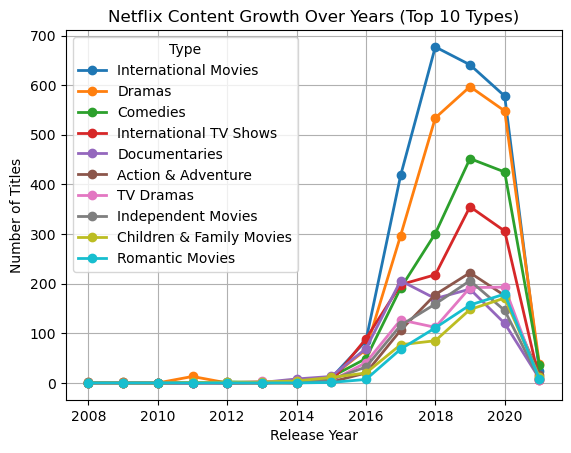

In [111]:
# Sum total titles per type
type_totals = df_exploded.groupby('Type').size().sort_values(ascending=False)
top_10_types = type_totals.head(10).index
yearly_trend = df_exploded.groupby(['release_year', 'Type']).size().unstack(fill_value=0)
# Filter yearly trend for top 10 types
yearly_trend_top = yearly_trend[top_10_types]

# Plot
plt.figure(figsize=(14,7))
yearly_trend_top.plot(kind='line', marker='o', linewidth=2)
plt.title('Netflix Content Growth Over Years (Top 10 Types)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


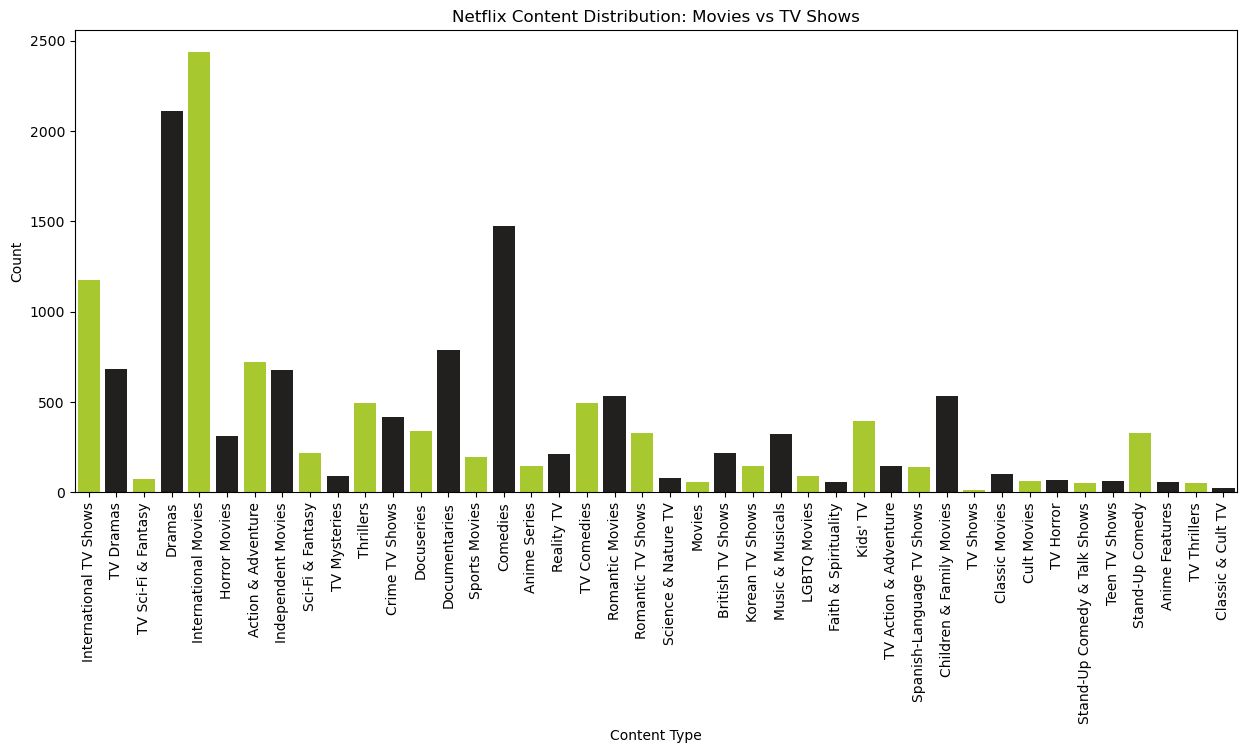

In [112]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_exploded,x='Type',palette=["#B6E215",'#221f1f'])
plt.title('Netflix Content Distribution: Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [113]:
all_categories = df_exploded['Category'].str.split(', ').dropna()
flat_categories = [cat for sublist in all_categories for cat in sublist]
categories_count = Counter(flat_categories)
top_categories = dict(categories_count.most_common(10))

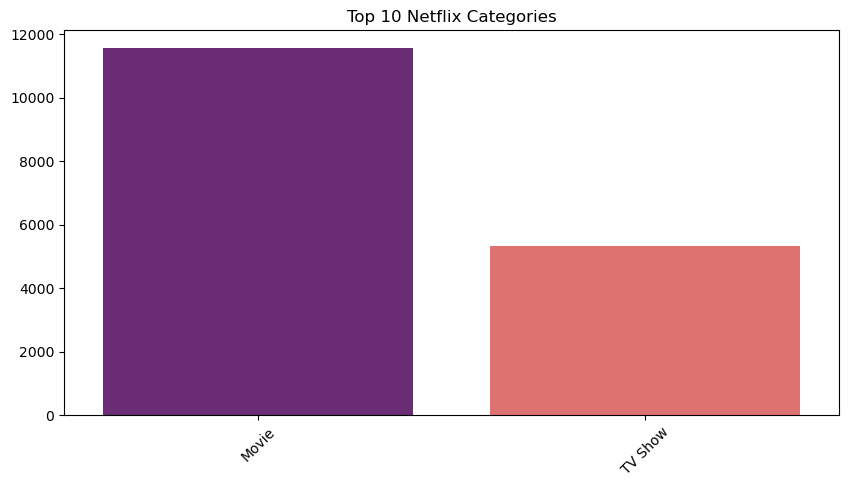

In [114]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(top_categories.keys()), y=list(top_categories.values()), palette='magma')
plt.title('Top 10 Netflix Categories')
plt.xticks(rotation=45)
plt.show()

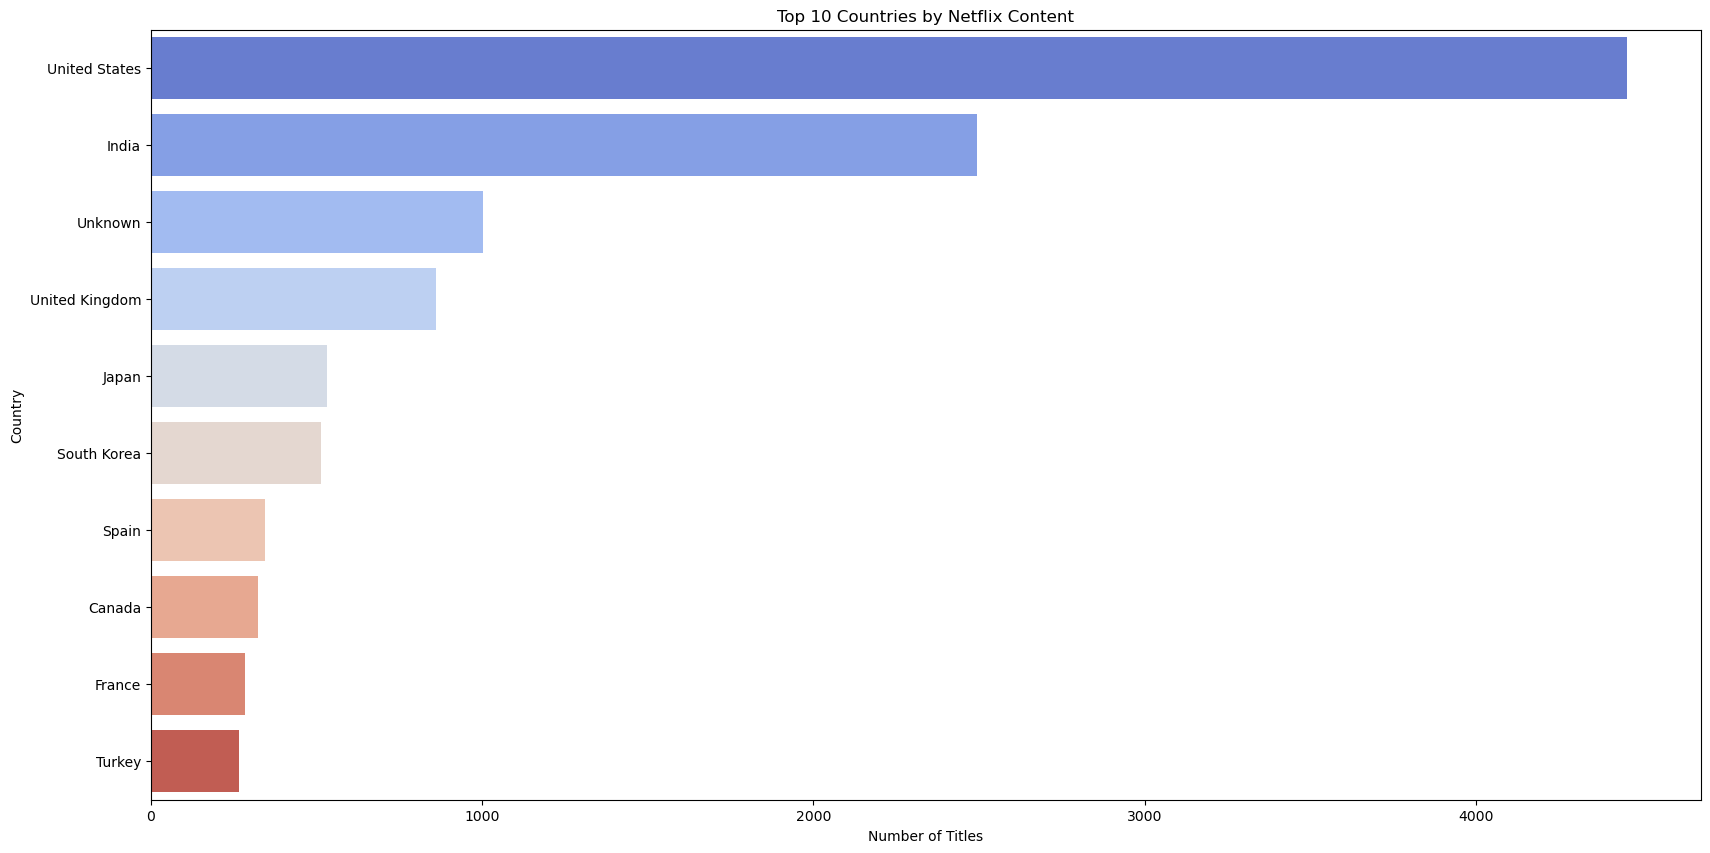

In [115]:
country_count = df_exploded['Country'].value_counts()

plt.figure(figsize=(20,10))
sns.barplot(x=country_count.values[:10], y=country_count.index[:10], palette='coolwarm')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries by Netflix Content')
plt.show()

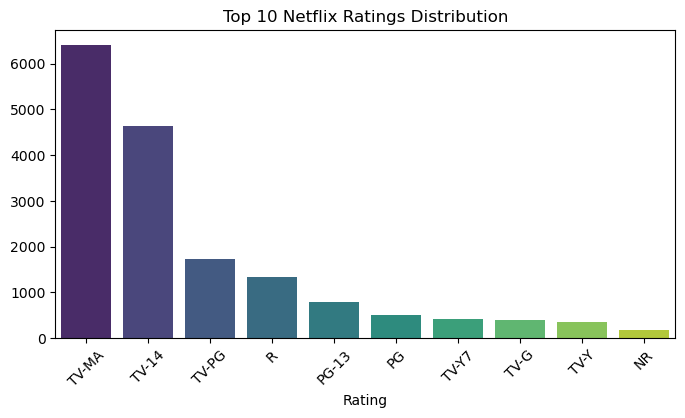

In [116]:
rating_count = df_exploded['Rating'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=rating_count.index, y=rating_count.values, palette='viridis')
plt.title('Top 10 Netflix Ratings Distribution')
plt.xticks(rotation=45)
plt.show()

Years with lowest content releases:
release_year
2010.0     1
2008.0     2
2009.0     2
2012.0     3
2013.0    10
dtype: int64


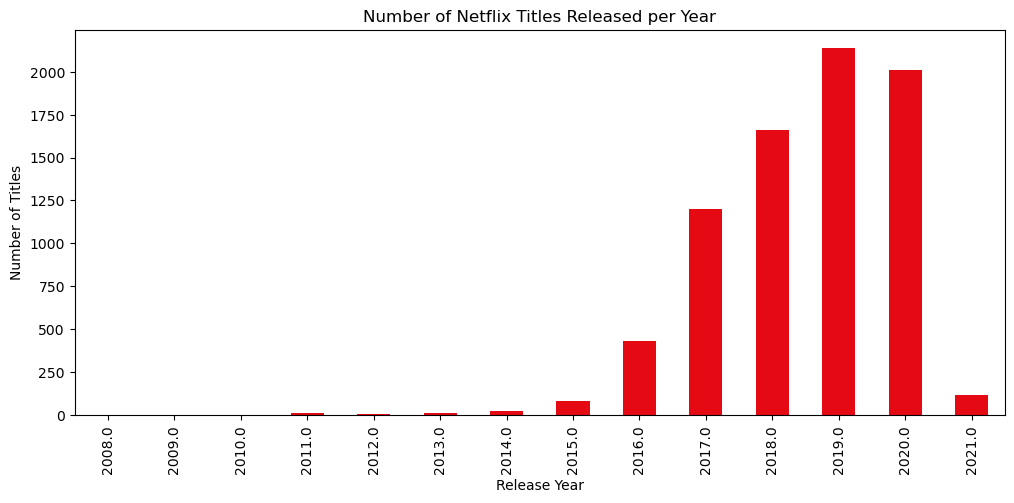

In [117]:
# Count total content released per year
yearly_count = df_clean.groupby('release_year').size()

# Find years with lowest content
low_content_years = yearly_count.sort_values().head(5)  # 5 years with lowest content
print("Years with lowest content releases:")
print(low_content_years)

# Optional: Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
yearly_count.plot(kind='bar', color='#E50914')
plt.title('Number of Netflix Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


Months with lowest content releases:
release_month
2.0    466
5.0    537
6.0    538
7.0    592
4.0    597
dtype: int64


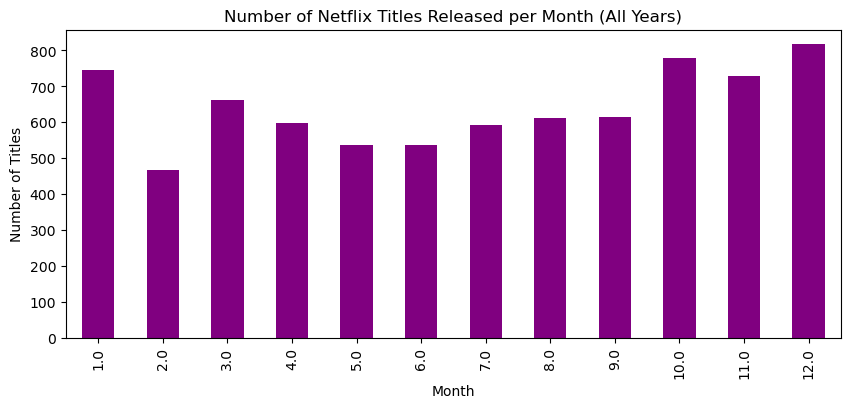

In [118]:
# Count releases by month
monthly_count = df_clean.groupby('release_month').size()

# Find months with lowest content
low_content_months = monthly_count.sort_values().head(5)
print("Months with lowest content releases:")
print(low_content_months)


# Plot
plt.figure(figsize=(10,4))
monthly_count.plot(kind='bar', color='purple')
plt.title('Number of Netflix Titles Released per Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.show()


In [119]:
print("Months with Highest content releases:")
print(monthly_count.sort_values(ascending=False).head(5))

Months with Highest content releases:
release_month
12.0    817
10.0    780
1.0     746
11.0    730
3.0     661
dtype: int64


In [120]:
top_directors = df_clean['Director'].value_counts().head(10)
top_cast = df_clean['Cast'].value_counts().head(10)
print("Top 10 Directors:")
print(top_directors)


Top 10 Directors:
Director
Unknown                   2295
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Steven Spielberg            10
David Dhawan                 9
Name: count, dtype: int64


In [121]:
print("Top 10 Cast:")
print(top_cast) 

Top 10 Cast:
Cast
No Cast Info                                                                                                              710
David Attenborough                                                                                                         18
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Craig Sechler                                                                                                               6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
Kevin Hart                                                                                                                  6
Jim Gaffigan                                                                                        

In [122]:
# Convert duration to numeric (e.g., '90 min' → 90)
df_clean['Duration_min'] = df_clean['Duration'].str.extract('(\d+)').astype(int)
avg_duration_per_type = df_clean.groupby('Type')['Duration_min'].mean()
print("Average Duration (min) by Type:")
print(avg_duration_per_type)


Average Duration (min) by Type:
Type
Action & Adventure                                              105.121212
Action & Adventure, Anime Features, Children & Family Movies    102.666667
Action & Adventure, Anime Features, Classic Movies              100.000000
Action & Adventure, Anime Features, Horror Movies                96.000000
Action & Adventure, Anime Features, International Movies         85.964286
                                                                   ...    
TV Horror, TV Mysteries, Teen TV Shows                            1.000000
TV Horror, Teen TV Shows                                          1.000000
TV Sci-Fi & Fantasy, TV Thrillers                                 3.000000
TV Shows                                                          1.000000
Thrillers                                                        97.244898
Name: Duration_min, Length: 487, dtype: float64


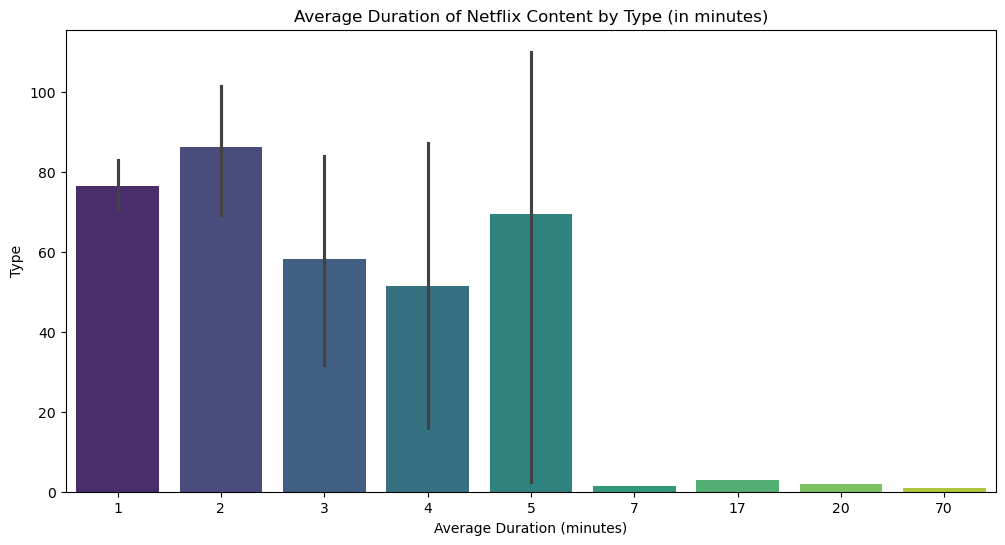

In [123]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_duration_per_type.value_counts(), y=avg_duration_per_type.value_counts().index, palette='viridis')
plt.title('Average Duration of Netflix Content by Type (in minutes)')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Type')
plt.show()

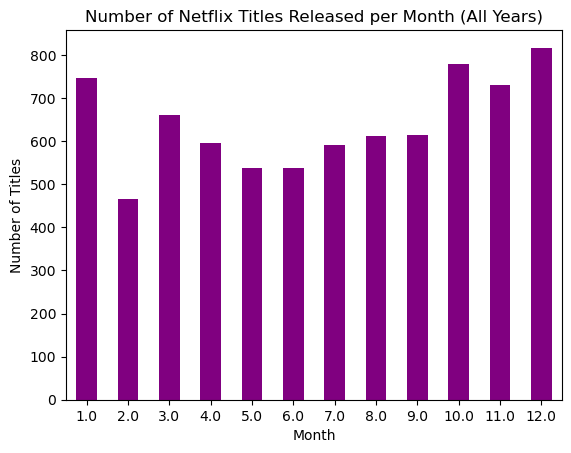

<Figure size 1200x600 with 0 Axes>

In [124]:
monthly_trend = df_clean.groupby('release_month').size()
monthly_trend.plot(kind='bar', color='purple')
plt.title('Number of Netflix Titles Released per Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.figure(figsize=(12,6))
plt.show()

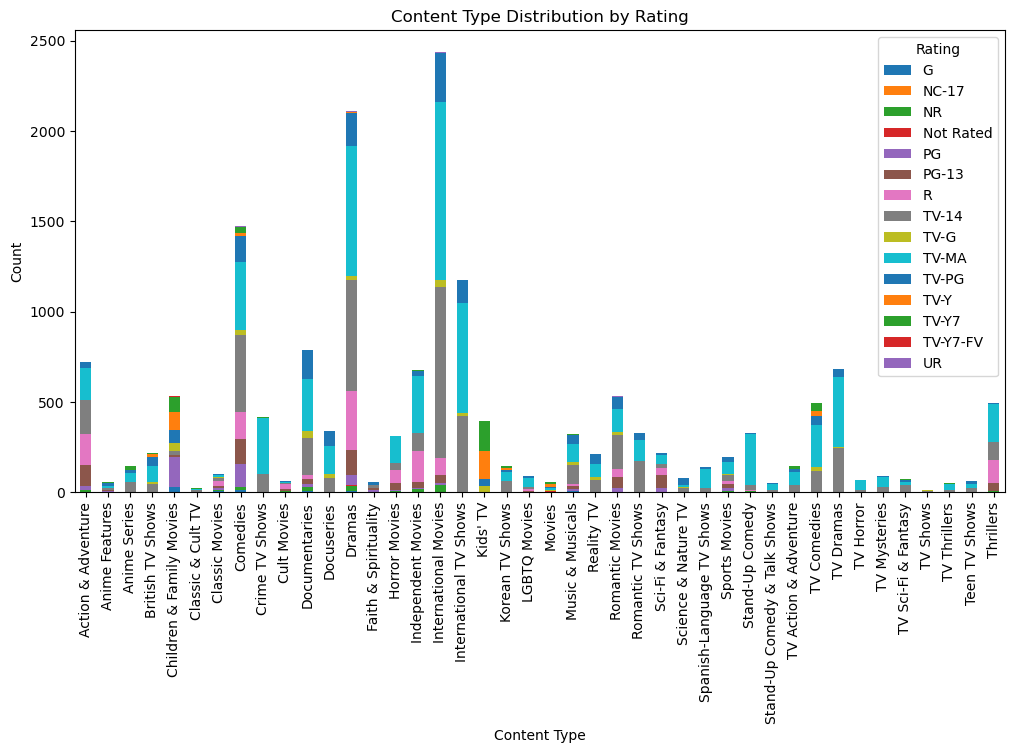

In [125]:
rating_type = pd.crosstab(df_exploded['Type'], df_exploded['Rating'])
rating_type.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Content Type Distribution by Rating')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


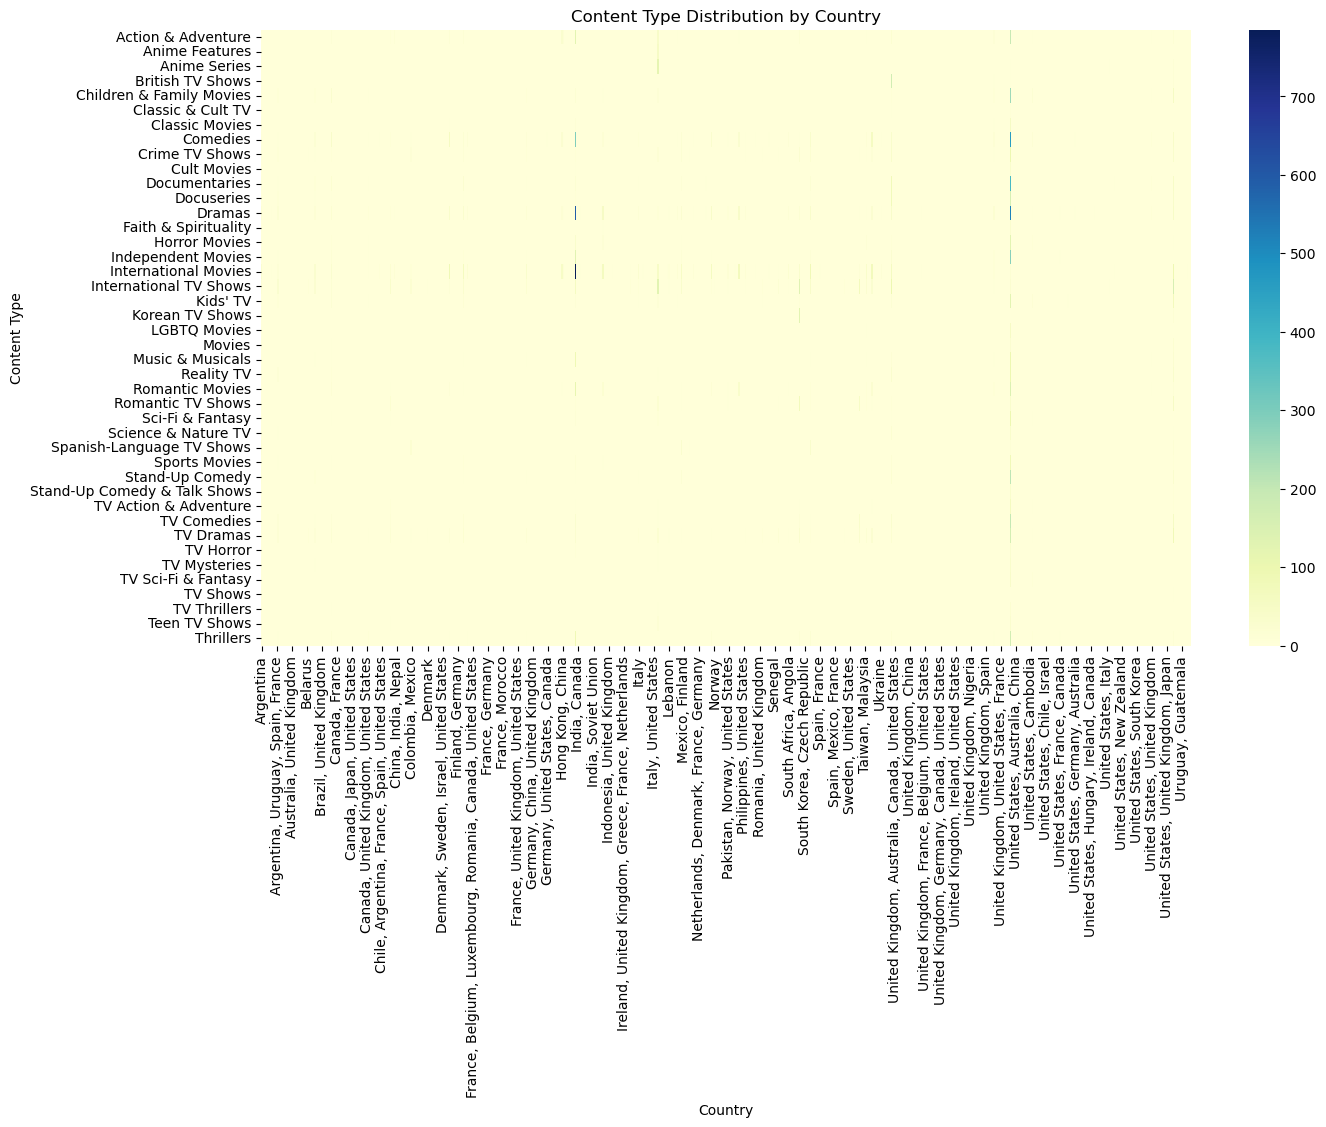

In [126]:
genre_country = pd.crosstab(df_exploded['Type'], df_exploded['Country'])
plt.figure(figsize=(15,8))
sns.heatmap(genre_country, cmap='YlGnBu')
plt.title('Content Type Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Content Type')
plt.show()
